In [2]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_min_max(stats, ax=None, title=None):
    """
    Plot min-max of every channel
    """
    min_val = stats['min'].numpy()
    max_val = stats['max'].numpy()
    channels = np.arange(len(min_val))

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(channels, min_val, 'o', label='min', markersize=1, color='green')
    ax.plot(channels, max_val, 'o', label='max', markersize=1, color='red')

    line_colors = ['blue', 'magenta', 'brown', 'black']
    for i in range(len(channels)):
        ax.plot([channels[i], channels[i]], [min_val[i], max_val[i]], '-', linewidth=0.5, alpha=0.2, color=line_colors[i % len(line_colors)])

    ax.set_title(title)
    ax.legend()

def plot_min_max_all_stats(layer_stats, module_name=None):
    """
    Plot stat in a subgraph
    """
    num_subplots = len(layer_stats)
    fig, axs = plt.subplots(1, num_subplots, figsize=(5*num_subplots, 5))
    fig.suptitle(module_name)

    for i, (category, stats) in enumerate(layer_stats.items()):
        title = f"{category} channel minmax"
        plot_min_max(stats, ax=axs[i], title=title)

    plt.show()

Observation 1: 对于Llama，layernorm总会在特定channel产生outlier。
- Self-attention中的`q/k/v_proj`，和MLP中的`up/gate_proj`都会受影响。这里只展示了`input_layernorm`，对于`post_attention_layernorm`，情况是类似的。


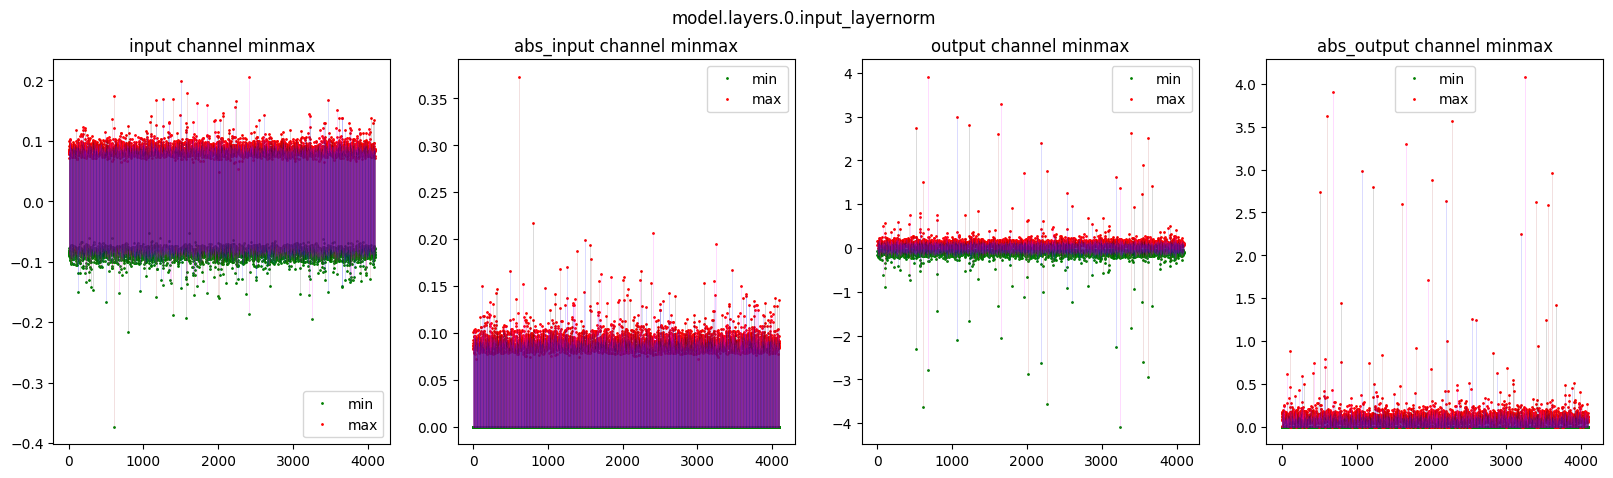

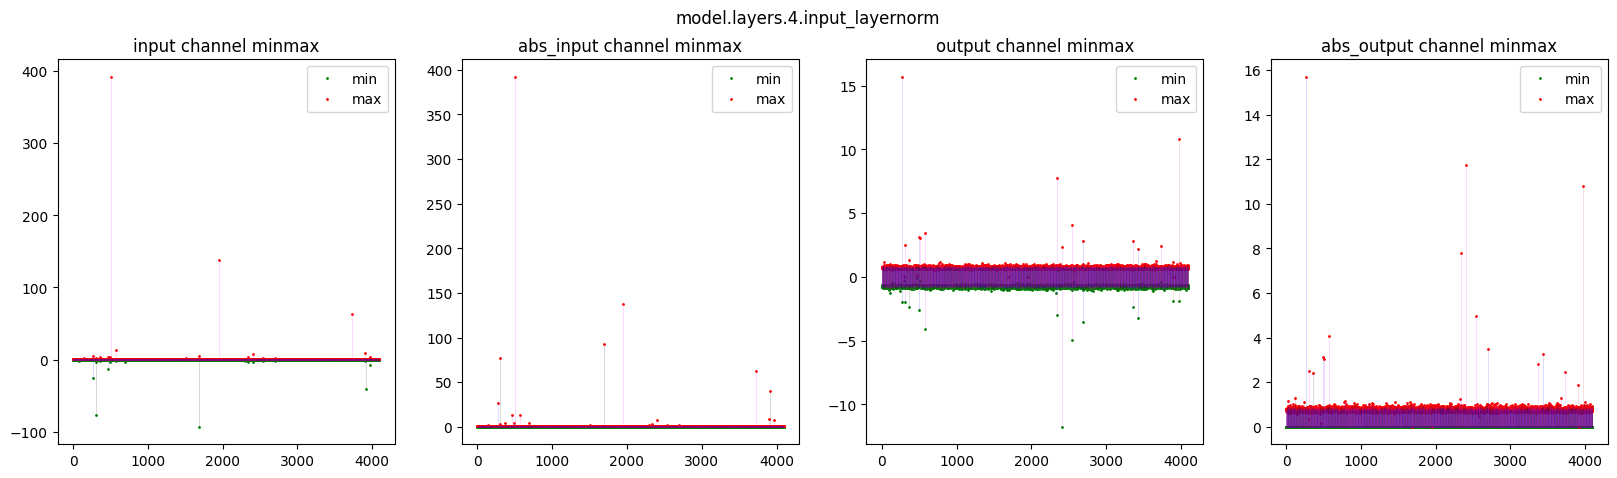

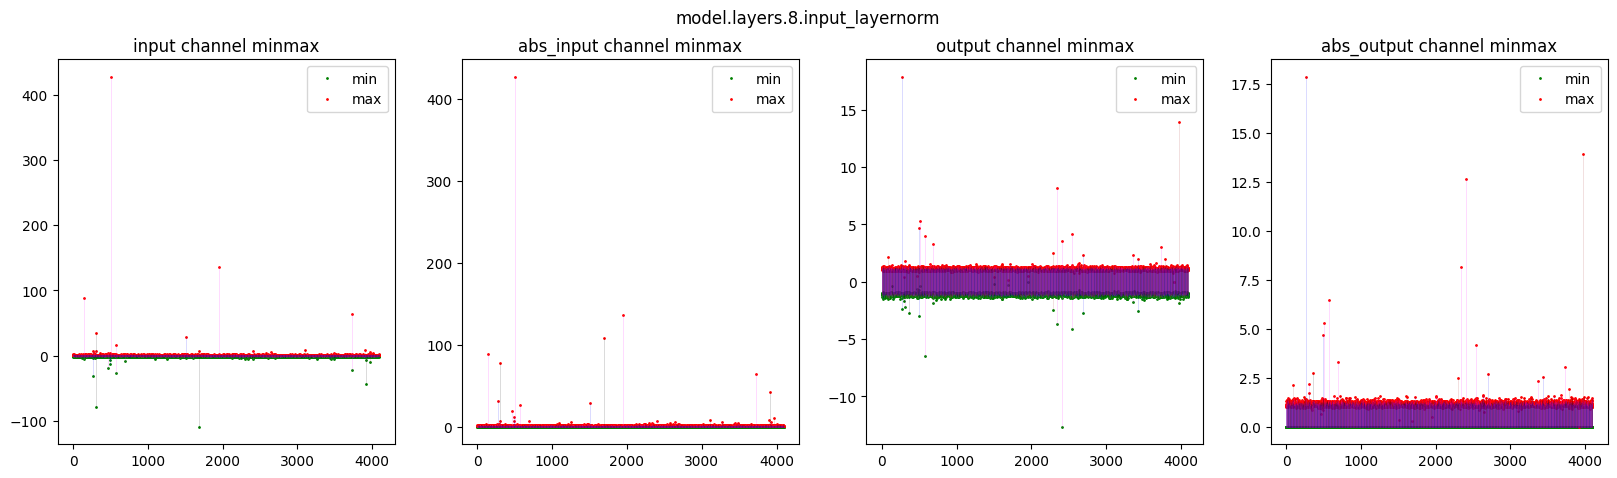

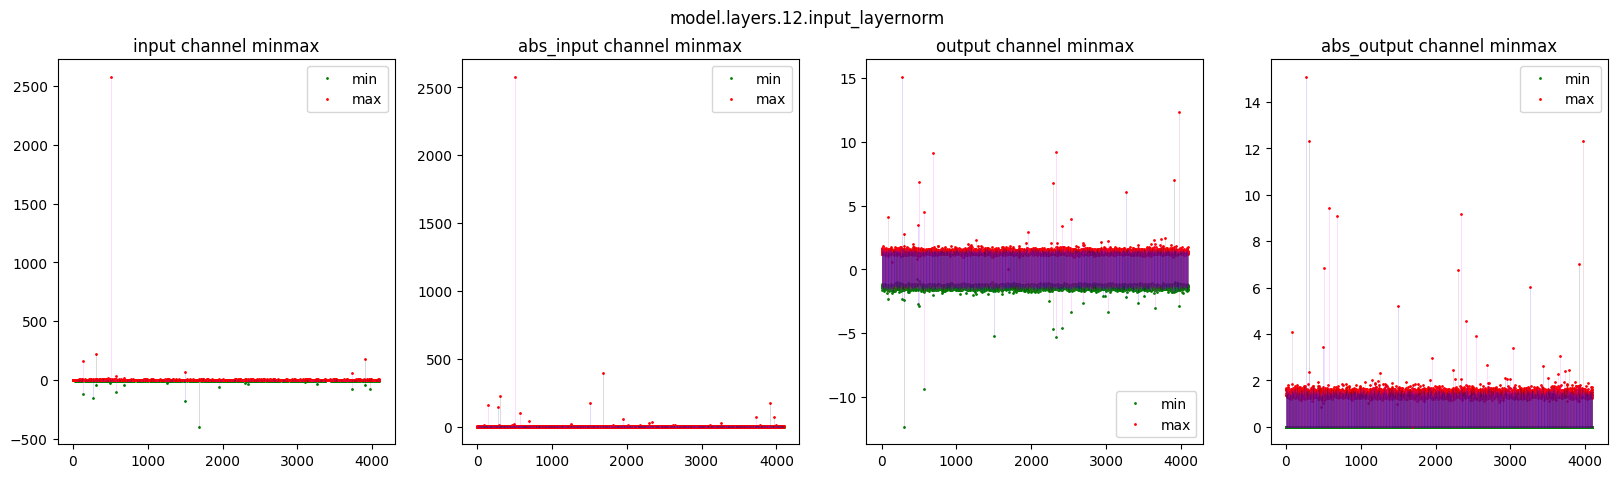

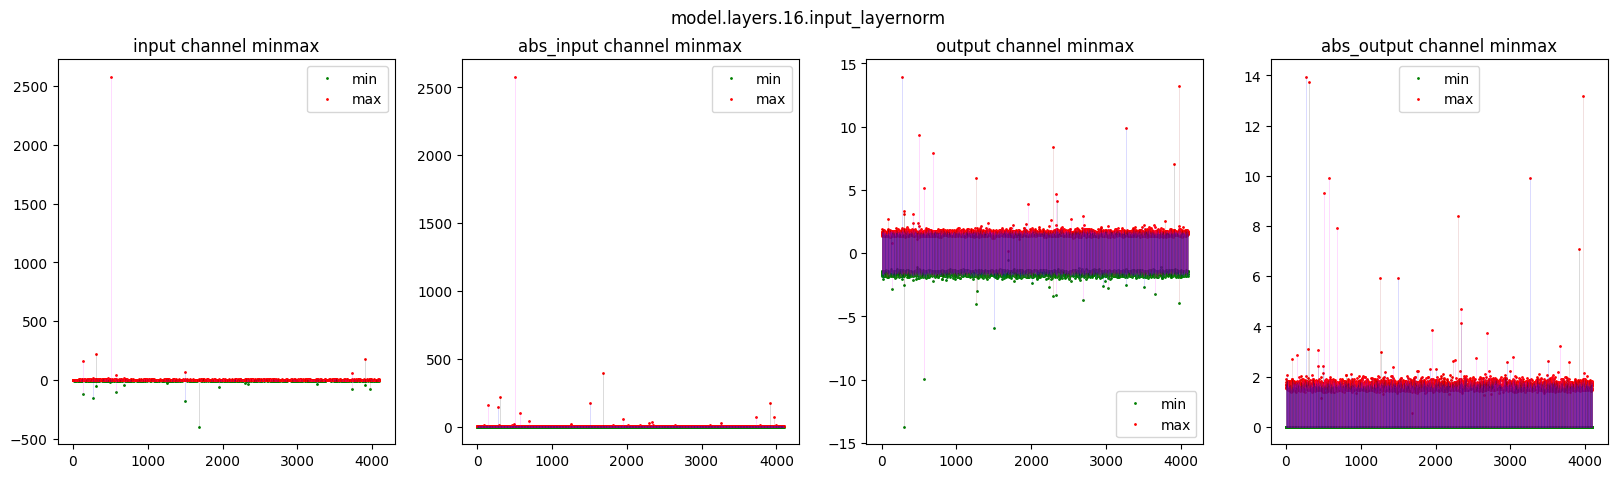

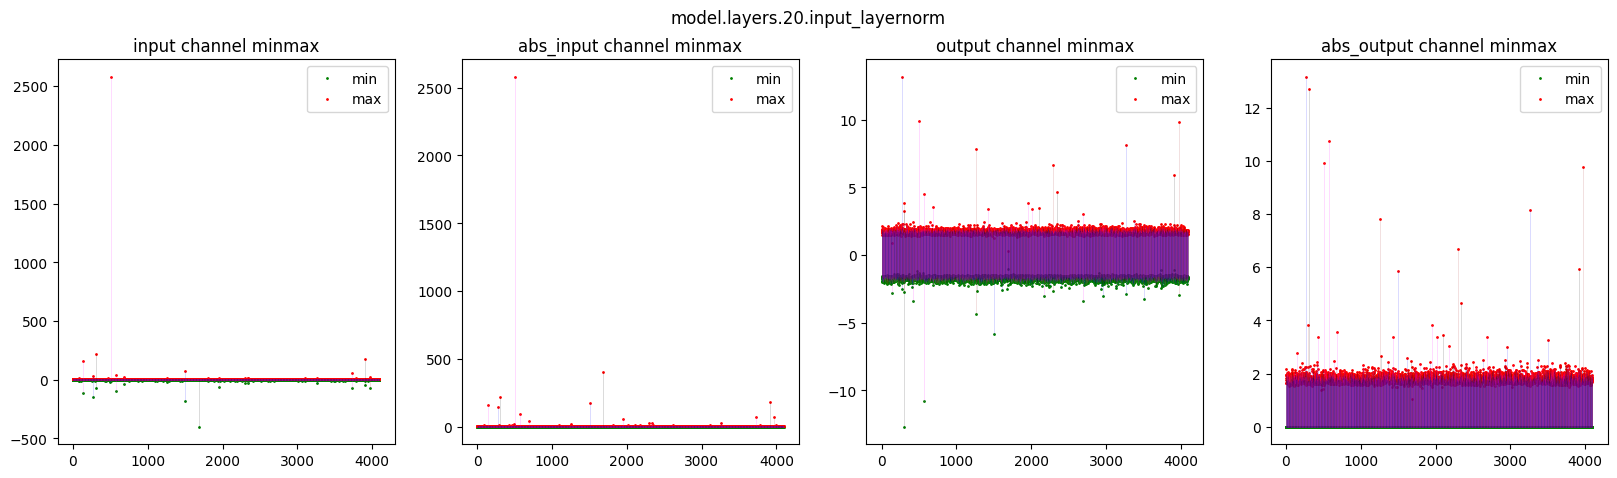

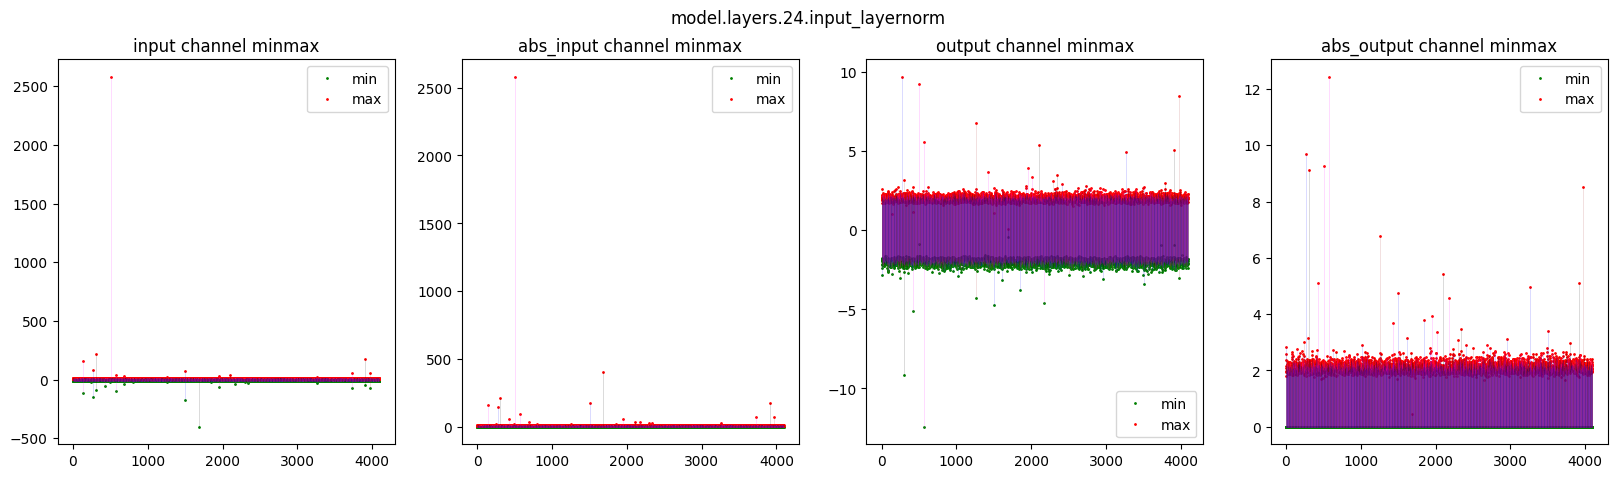

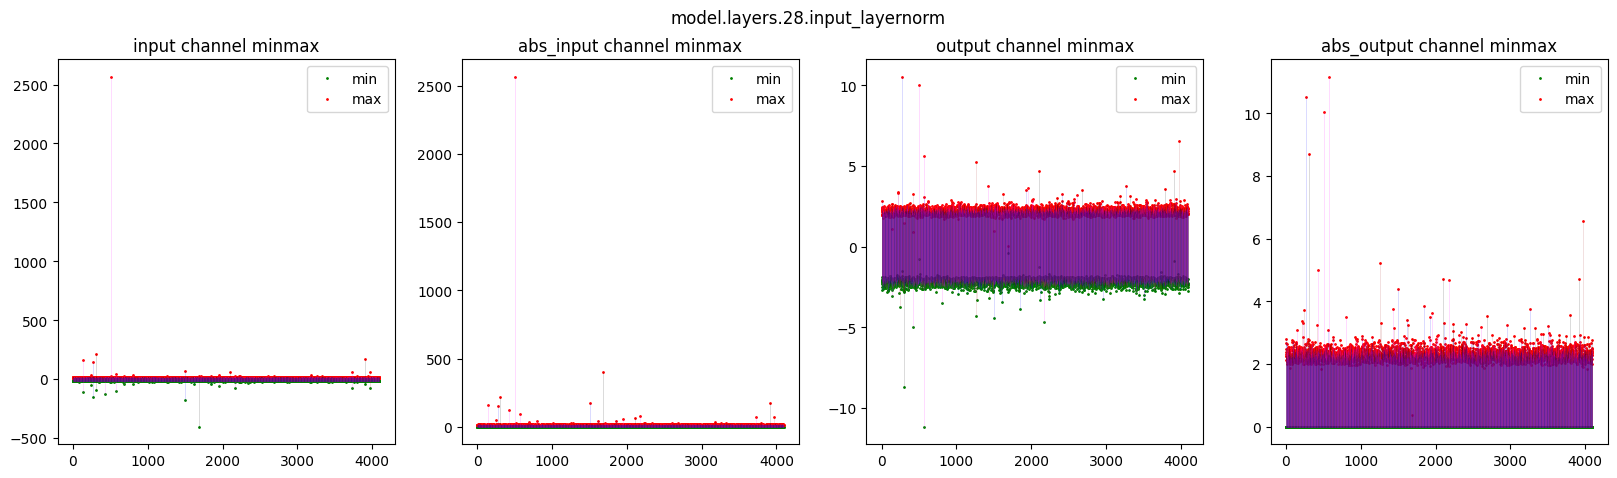

In [4]:
act_stats = torch.load('act_stats/llama-7b-hf-transformers-4.29.pt')

for module_name, layer_stats in act_stats.items():
    # only examine layernorm
    if 'input_layernorm' not in module_name:
        continue
    # check every 8 layers
    if int(module_name.split('.')[-2]) % 4 != 0:
        continue

    plot_min_max_all_stats(layer_stats, module_name=module_name)

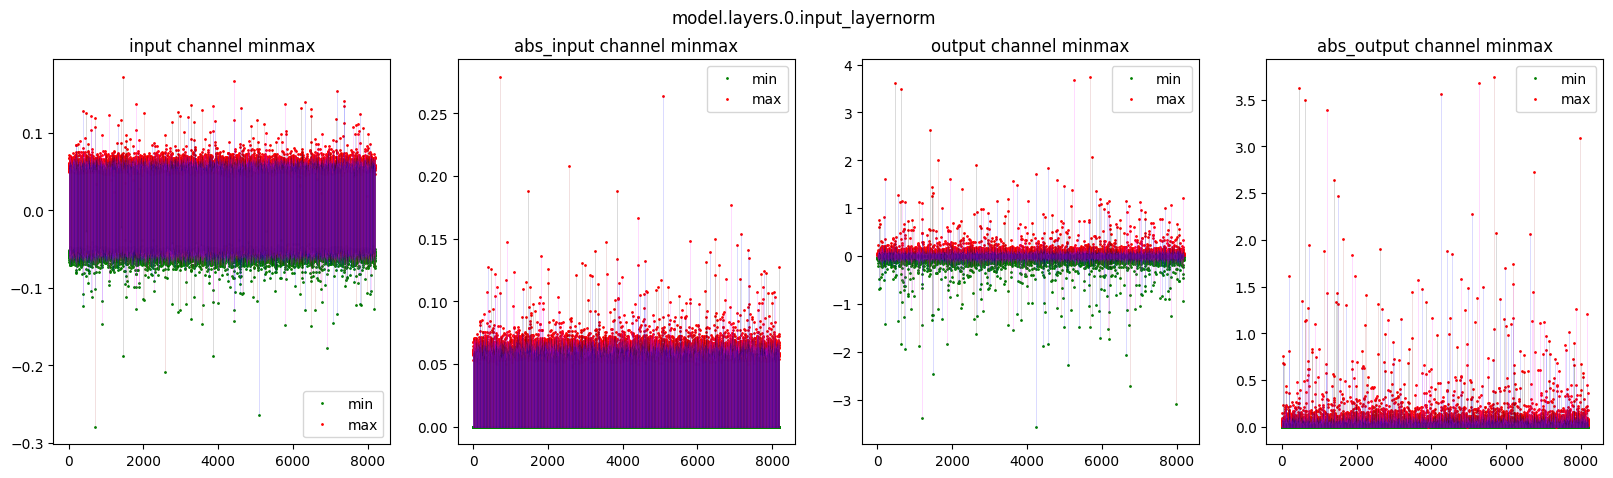

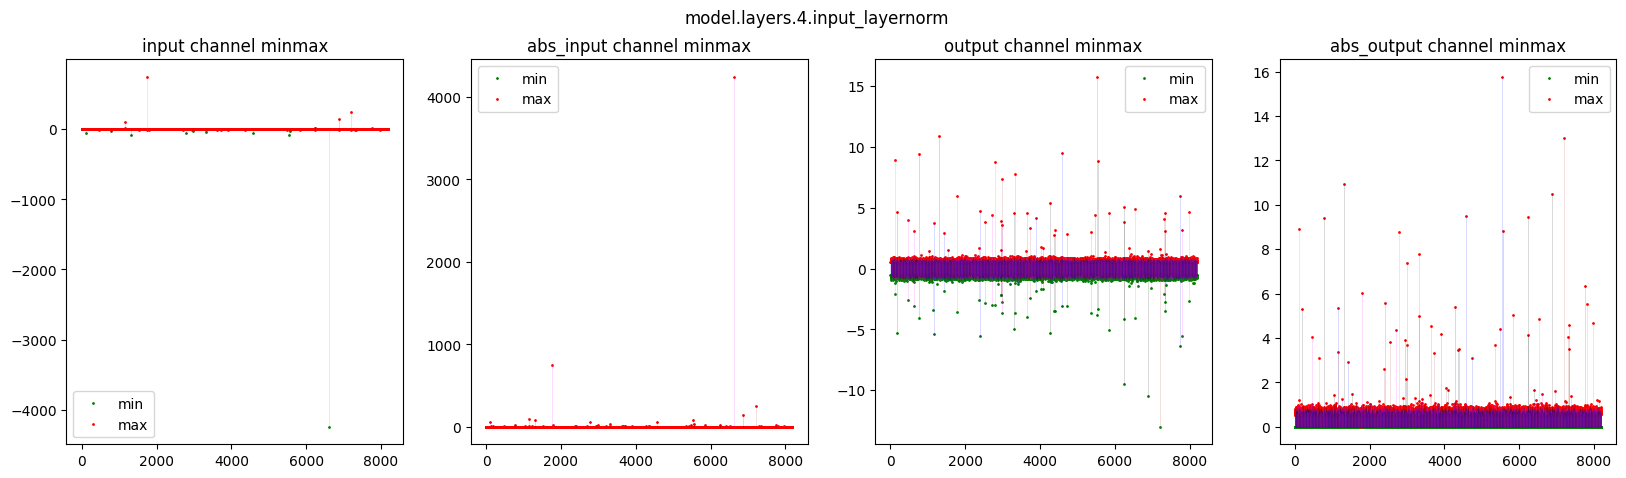

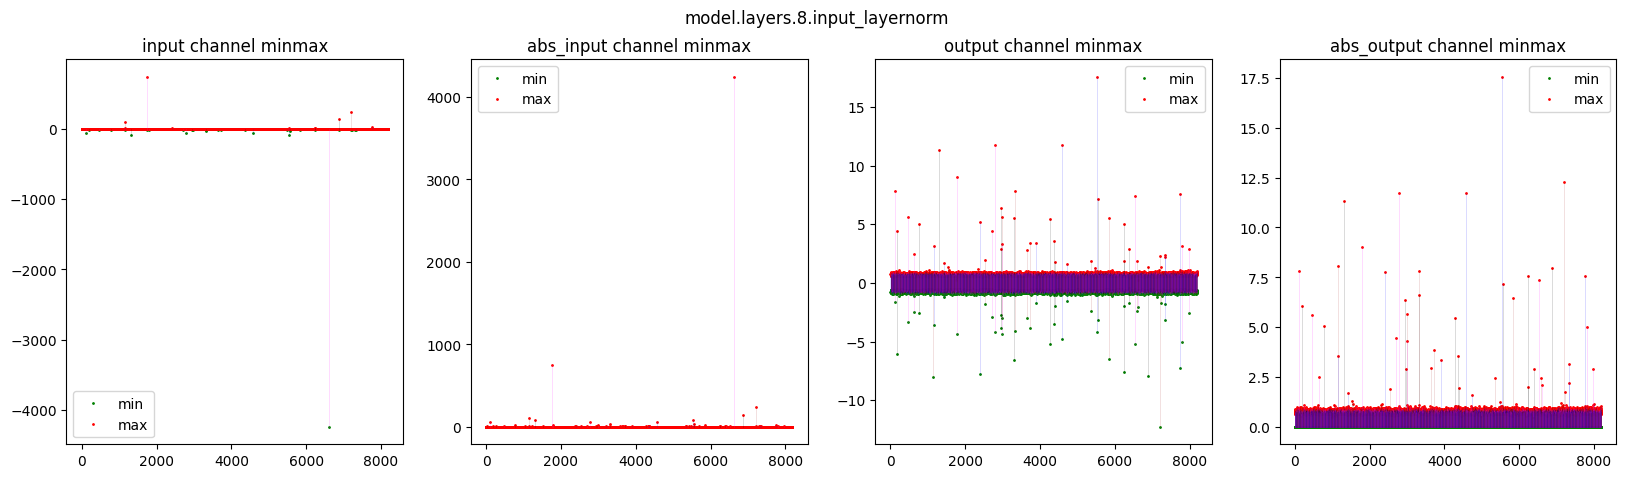

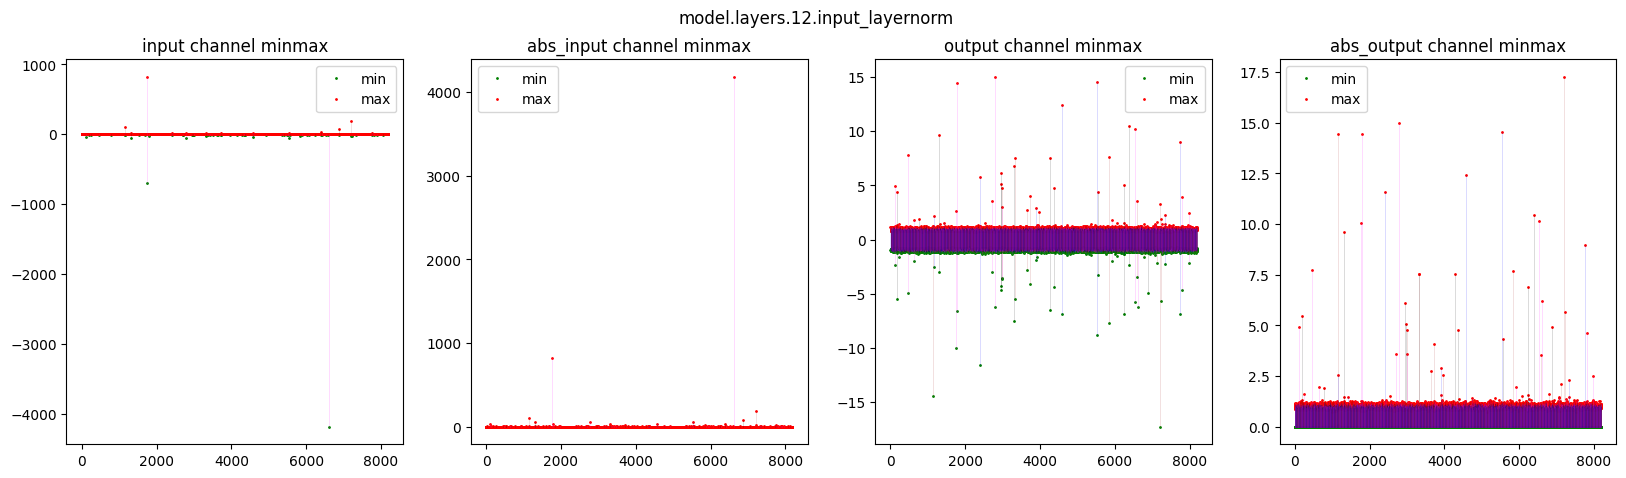

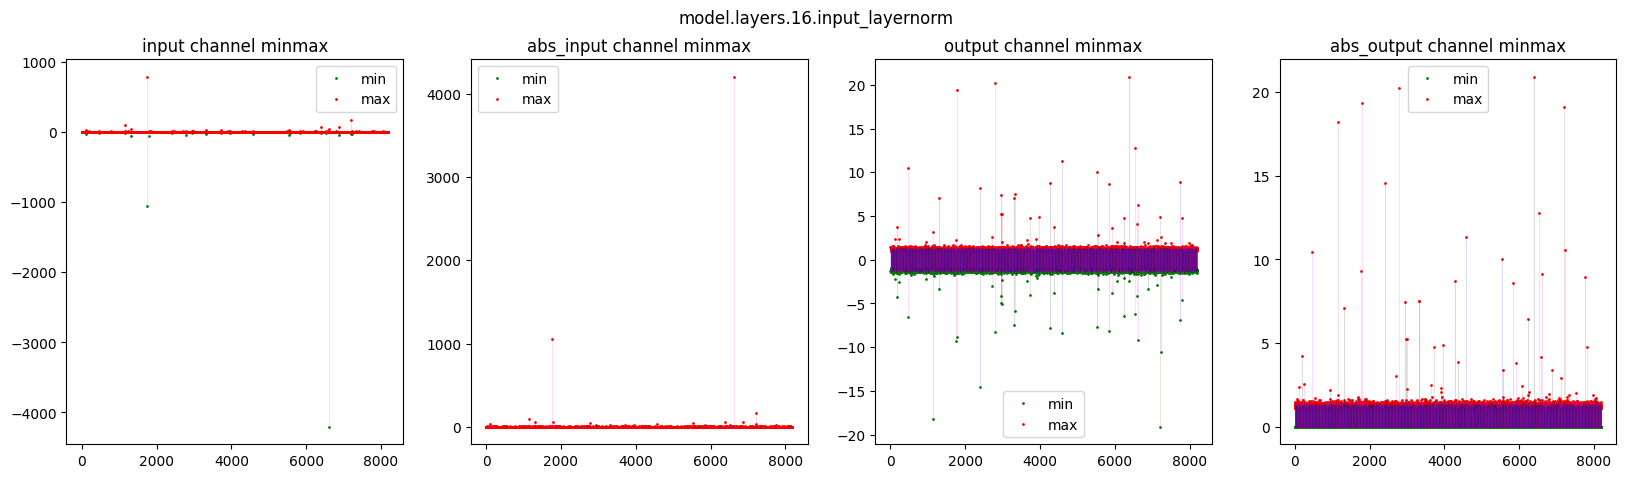

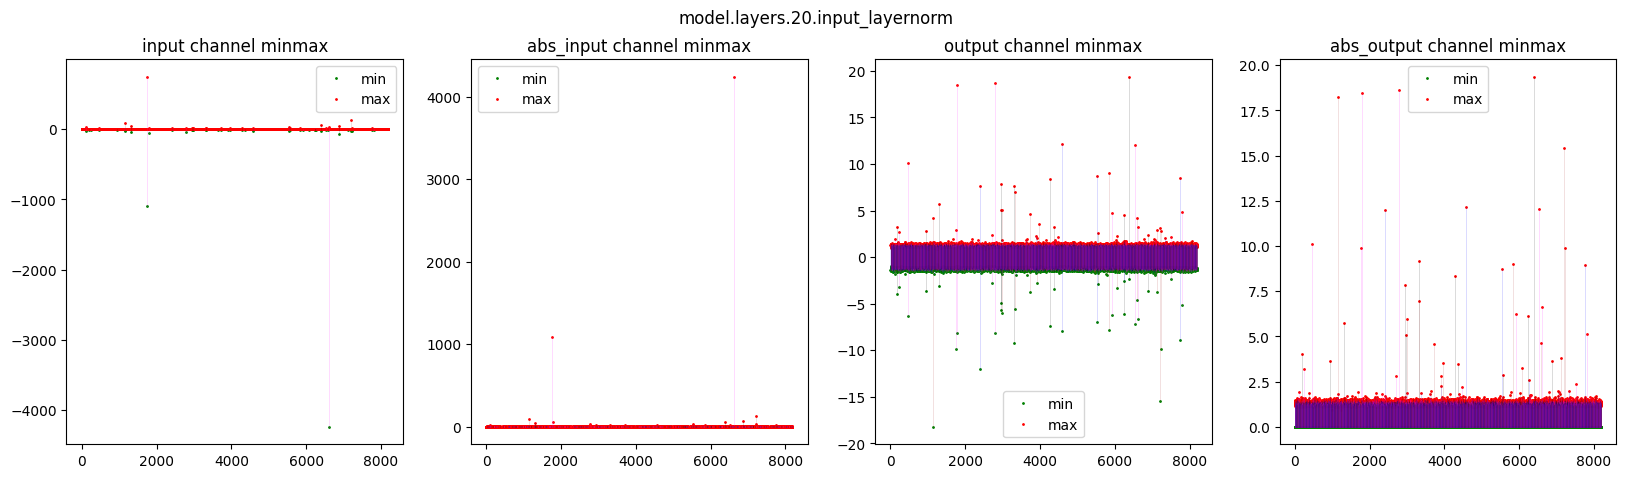

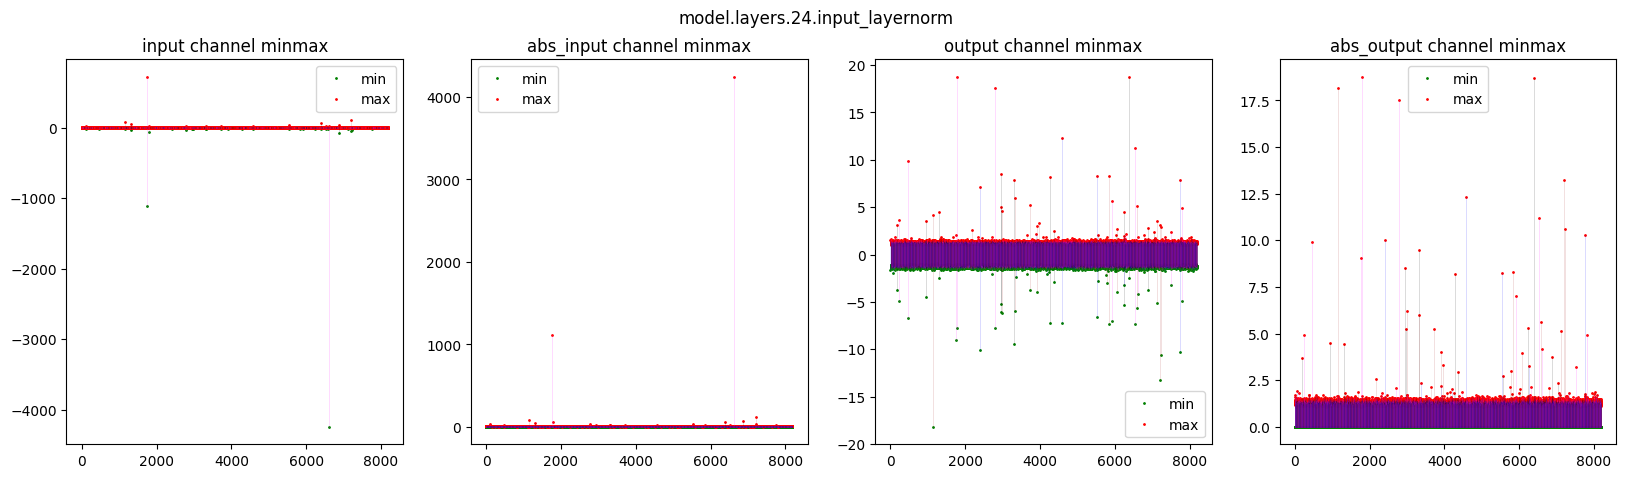

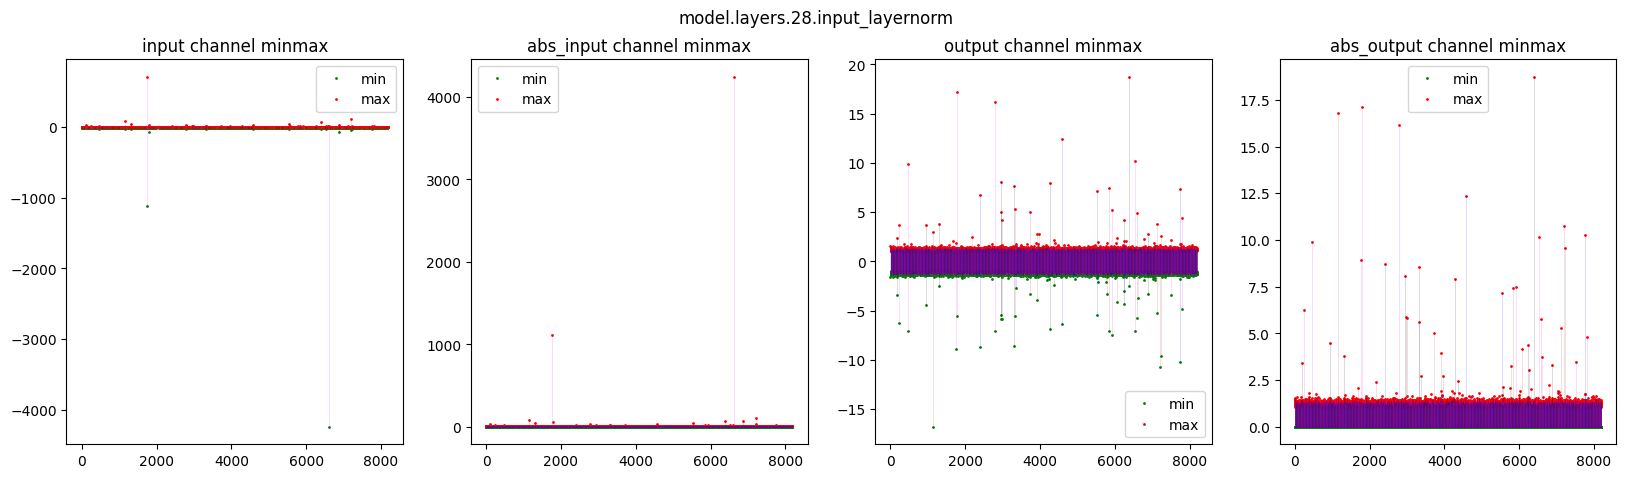

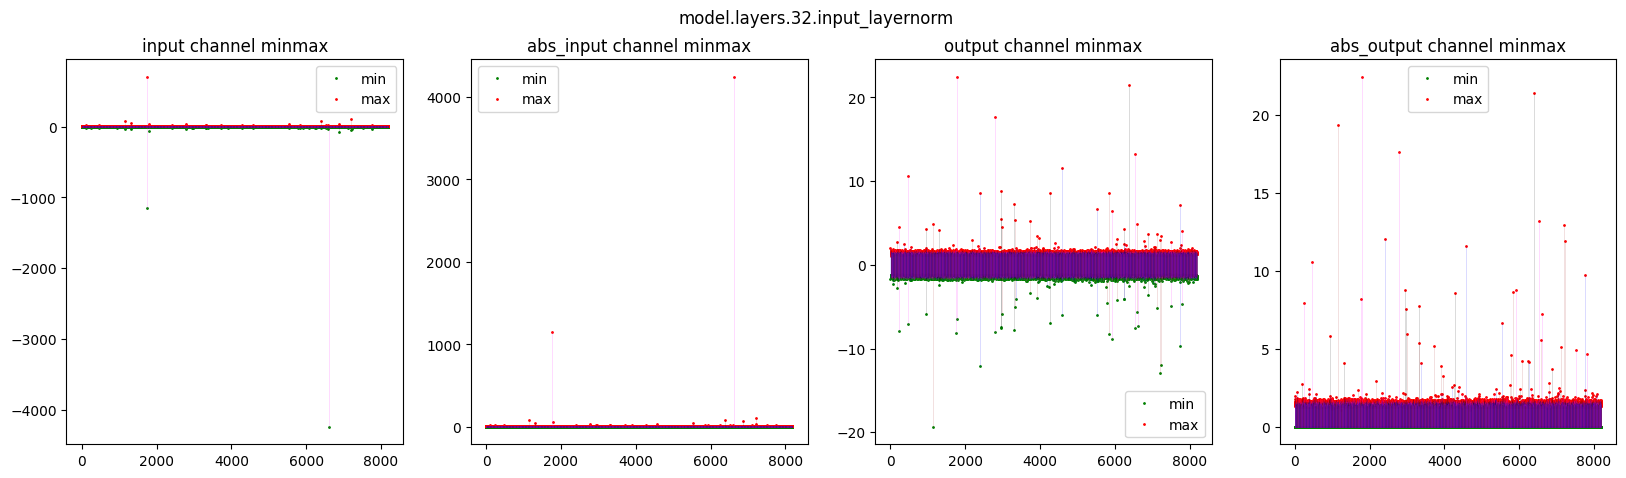

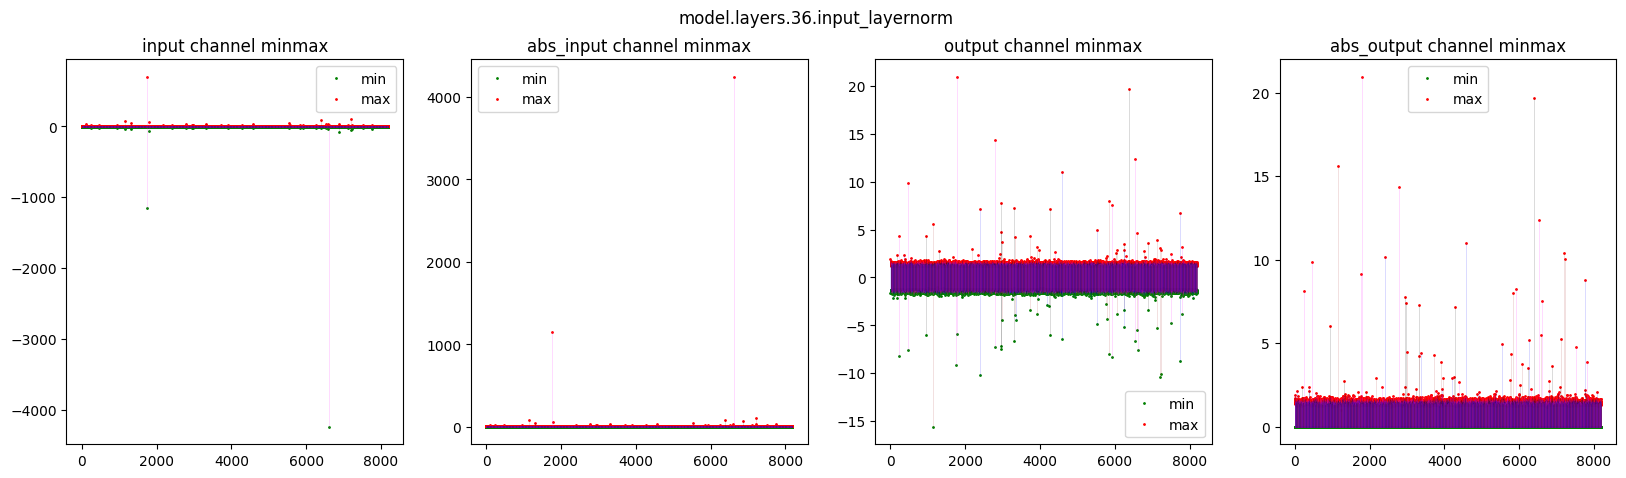

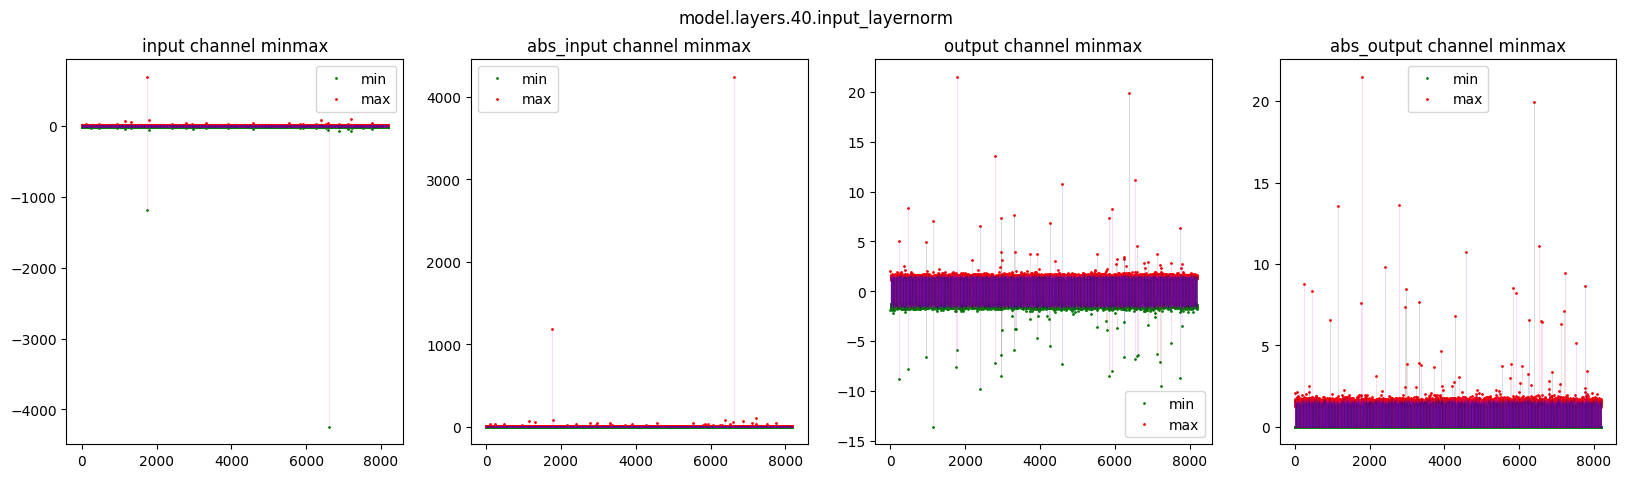

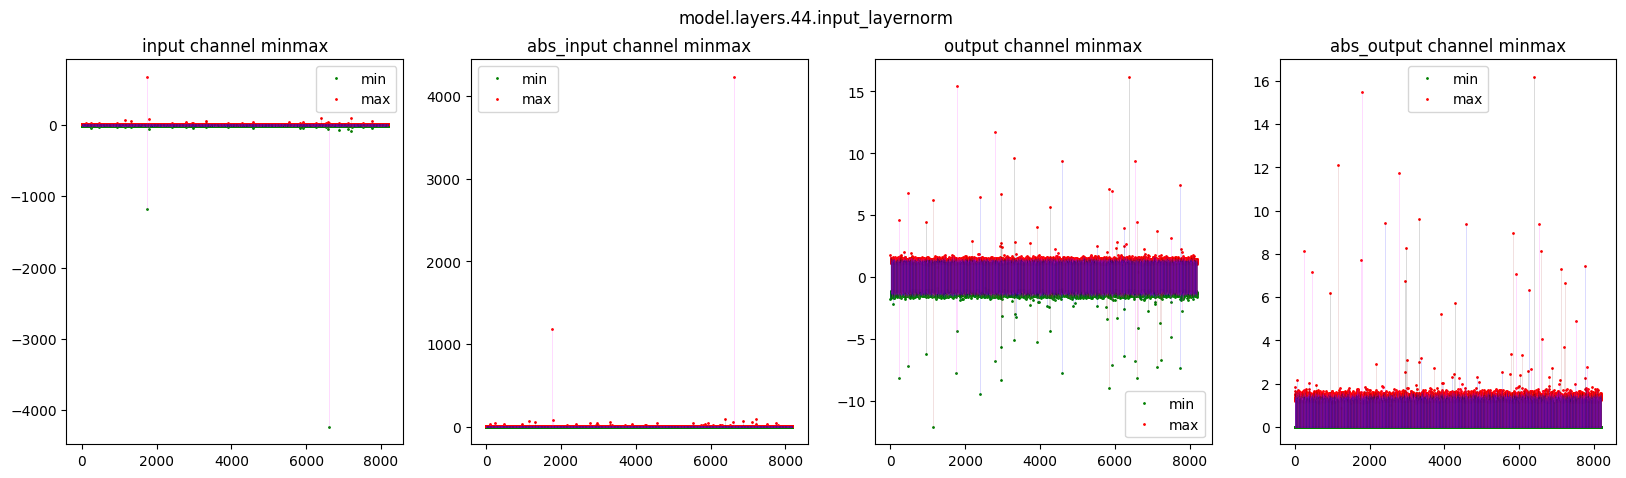

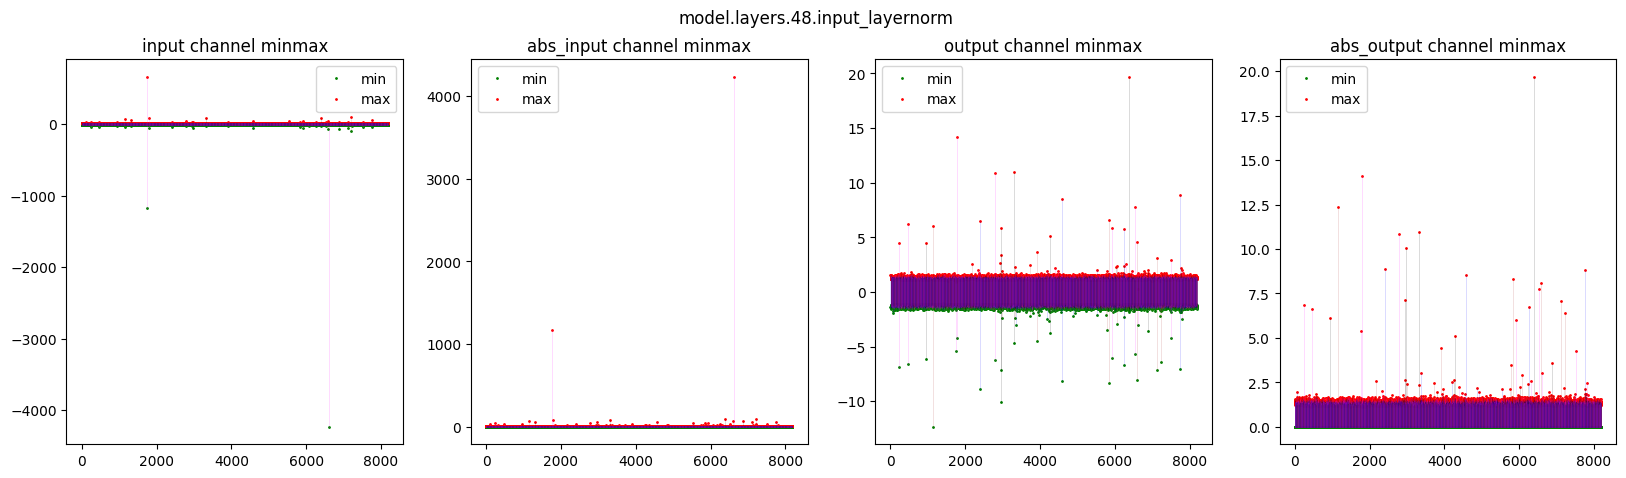

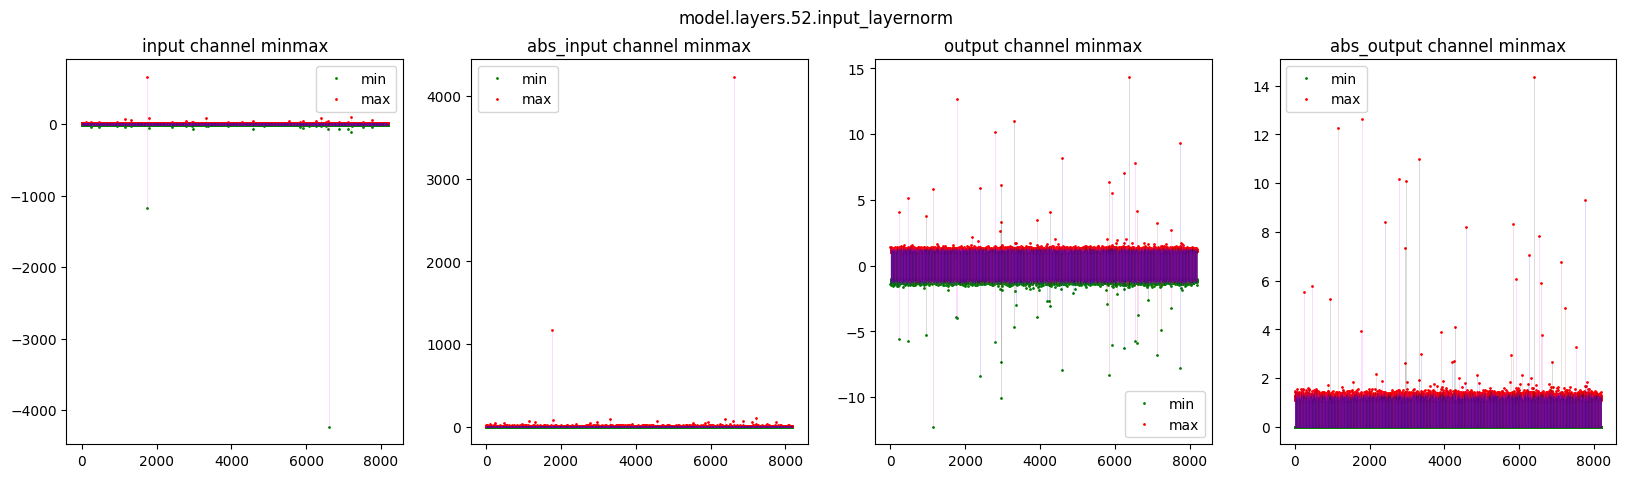

/home/xuechenhao/anaconda3/envs/awq/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


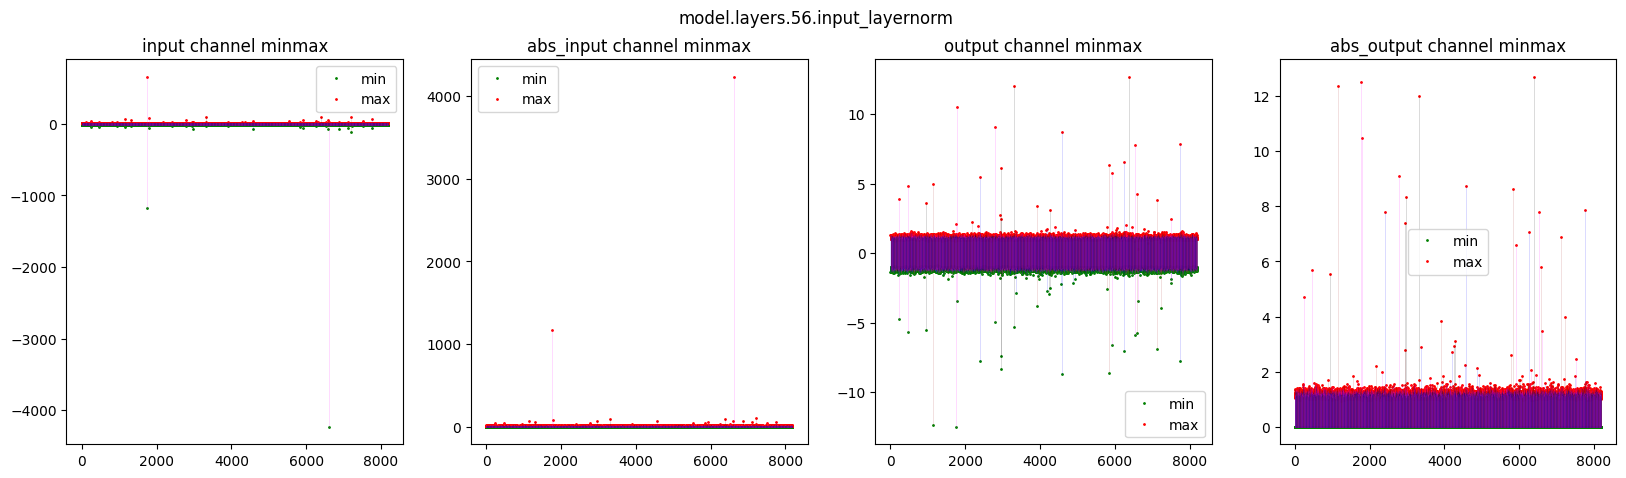

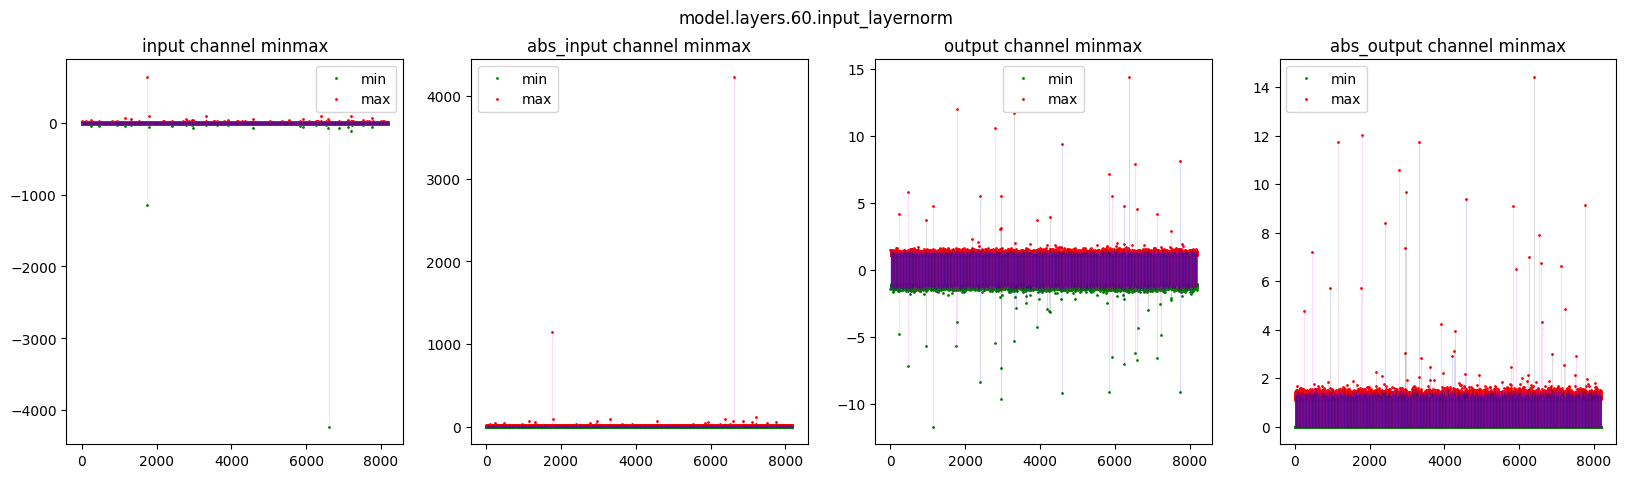

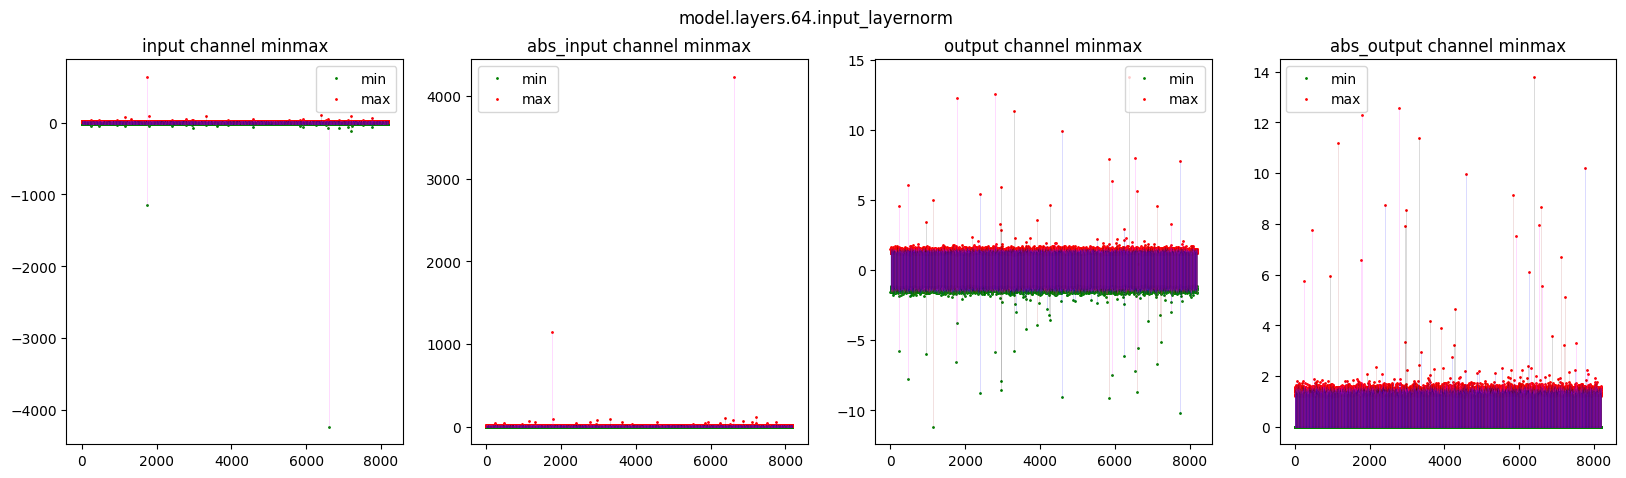

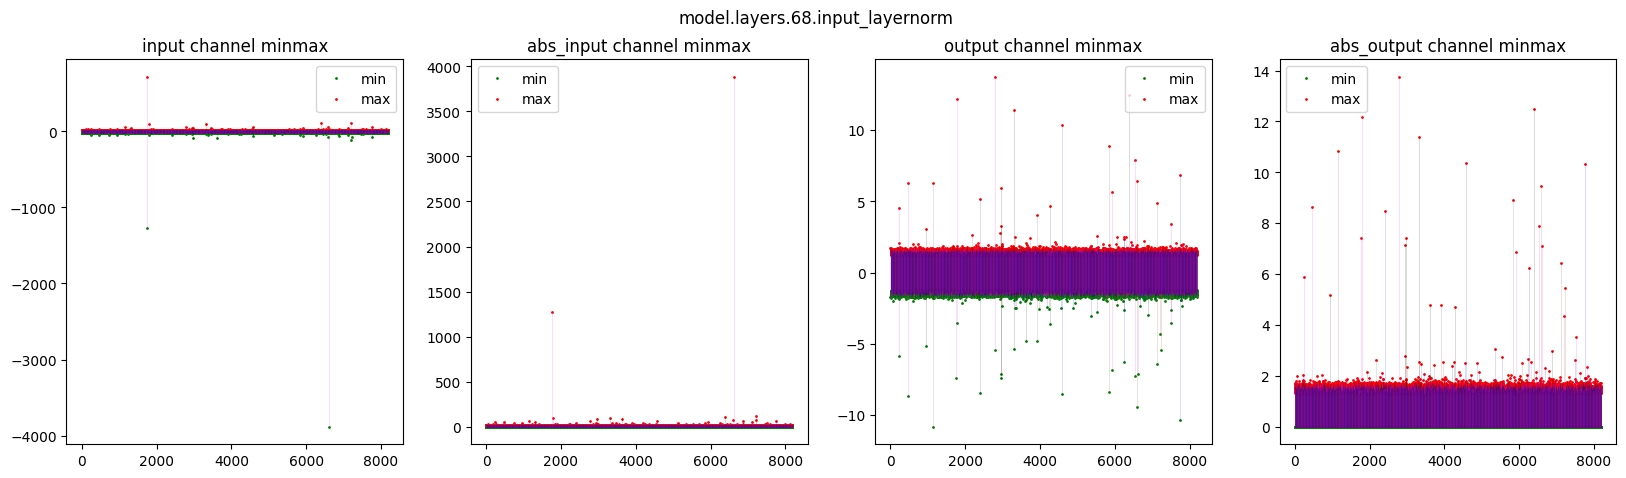

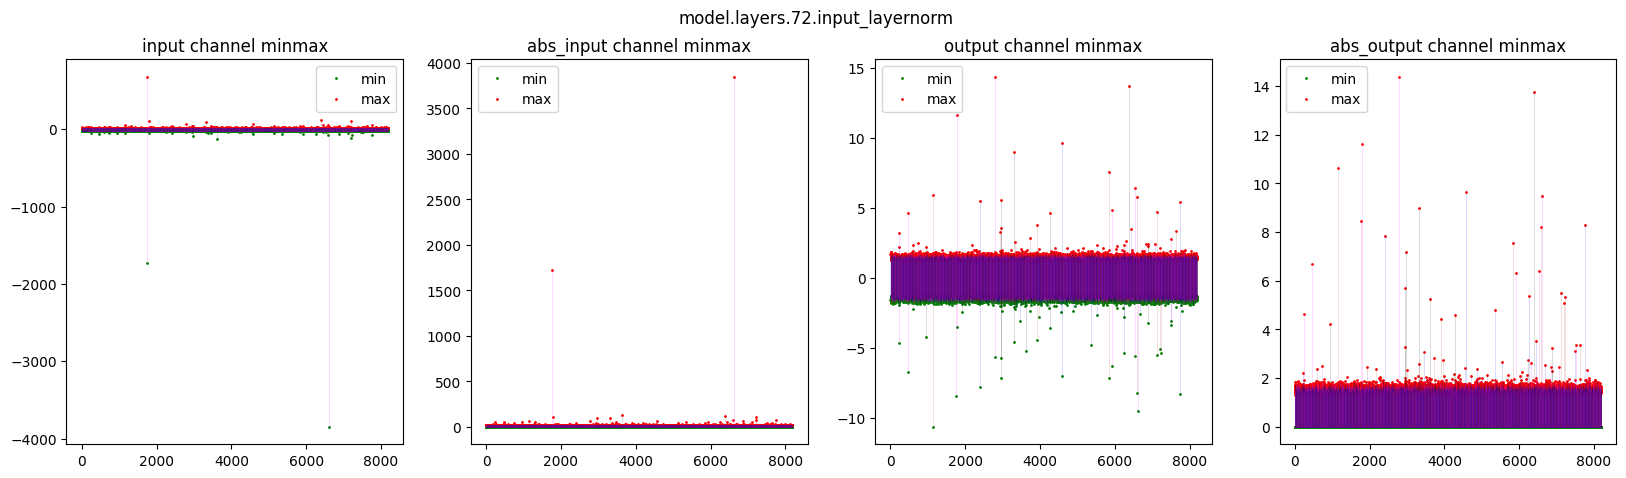

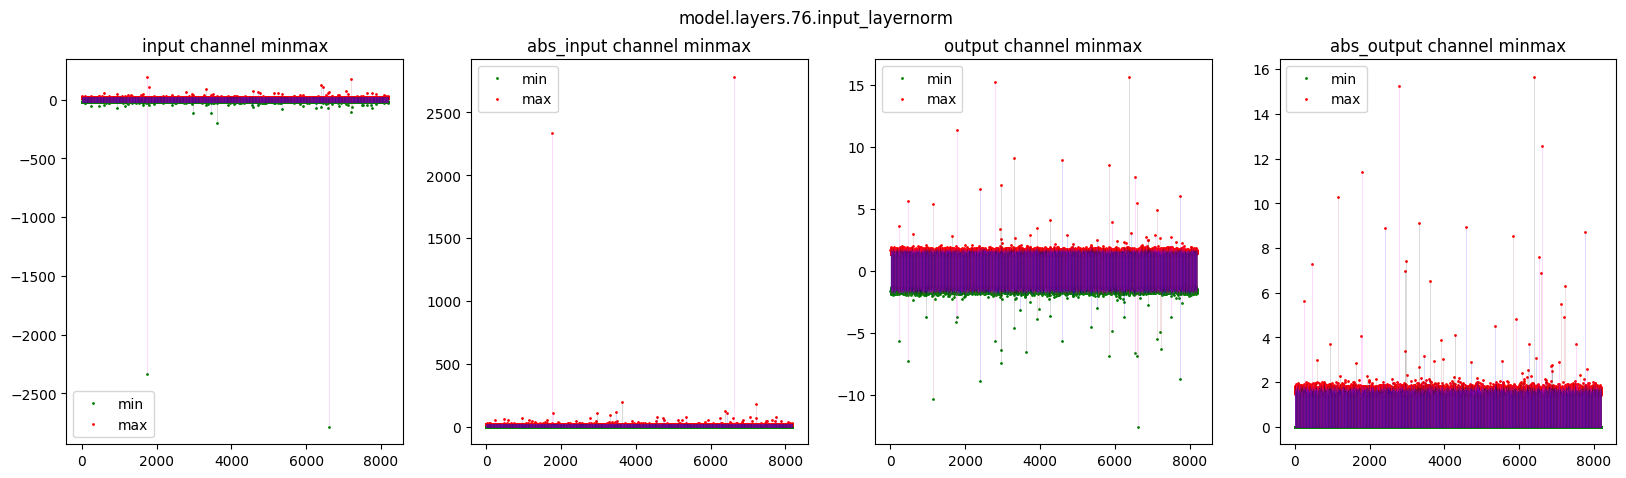

In [5]:
# check larger model
act_stats = torch.load('act_stats/llama-65b-hf-transformers-4.29.pt')

for module_name, layer_stats in act_stats.items():
    # only examine layernorm
    if 'input_layernorm' not in module_name:
        continue
    # check every 8 layers
    if int(module_name.split('.')[-2]) % 4 != 0:
        continue

    plot_min_max_all_stats(layer_stats, module_name=module_name)